<a href="https://colab.research.google.com/github/SKgain/dl-model/blob/main/CNN_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/JavaFest/dataset_split.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1066.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1067.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1069.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_107.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1070.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1071.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1073.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1076.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1077.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1078.jpg  
  inflating: /content/dataset_split/train/General_Waste/General_Waste_1079.jpg  
  inflating: /content/dataset_split/train/General_Waste/Gen

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# --- Paths for Google Colab environment ---
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'
test_dir = '/content/dataset_split/test'

# --- Constants updated for faster training ---
IMAGE_SIZE = (150, 150)  # CHANGED: Smaller images for faster training
BATCH_SIZE = 64          # CHANGED: Larger batch size for GPU efficiency
NUM_CLASSES = 4

# --- Data generators (no changes needed) ---
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

test_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# --- Model architecture (no changes needed) ---
# NOTE: Input shape must match the new IMAGE_SIZE
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), # CHANGED input_shape
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# --- Compile and Train (no changes needed) ---
optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

# --- Evaluate and Save (no changes needed) ---
print("\nEvaluating on the test set...")
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

model.save('waste_classifier_tuned_cnn.h5')
print("Model saved as waste_classifier_tuned_cnn.h5")

Found 5250 images belonging to 4 classes.
Found 1124 images belonging to 4 classes.
Found 1128 images belonging to 4 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 34, 34, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 15, 15, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,766,724 (18.18 MB)

 Trainable params: 4,764,804 (18.18 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1107s 13s/step - accuracy: 0.5003 - loss: 1.5428 - val_accuracy: 0.2491 - val_loss: 5.0340
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1137s 14s/step - accuracy: 0.6175 - loss: 0.9464 - val_accuracy: 0.2491 - val_loss: 7.2948
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1108s 13s/step - accuracy: 0.6252 - loss: 0.8849 - val_accuracy: 0.2491 - val_loss: 6.5385
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1192s 14s/step - accuracy: 0.6537 - loss: 0.8415 - val_accuracy: 0.2714 - val_loss: 3.4117
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1116s 13s/step - accuracy: 0.6766 - loss: 0.7947 - val_accuracy: 0.4164 - val_loss: 1.9496
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1151s 13s/step - accuracy: 0.6652 - loss: 0.7947 - val_accuracy: 0.5774 - val_loss: 1.1243
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1150s 14s/step - accuracy: 0.6890 - loss: 0.7707 - val_accuracy: 0.6628 - val_loss: 0.8649
Epoch 8/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 1111s 13s/step - accuracy: 0.6994 - loss: 0.7500 - val_accu


Test accuracy: 77.30%
Model saved as waste_classifier_tuned_cnn.h5


In [7]:
from google.colab import files

# This will start the download process in your browser
files.download('waste_classifier_tuned_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import files

# This will open a dialog to let you upload a file
uploaded = files.upload()

# Get the name of the file you uploaded
test_image_path = list(uploaded.keys())[0]

print(f"Image '{test_image_path}' uploaded successfully.")

Saving r4.jpg to r4.jpg
Image 'r4.jpg' uploaded successfully.


In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# --- Configuration ---
MODEL_PATH = 'waste_classifier_tuned_cnn.h5'
IMAGE_SIZE = (150, 150) # Must be the same size you trained with
# The class names must be in the same order as the training folders
CLASS_NAMES = ['Compost', 'General_Waste', 'Hazardoos', 'Recycle']


# --- 1. Load the trained model ---
model = tf.keras.models.load_model(MODEL_PATH)


# --- 2. Load and Preprocess the single image ---
# Load the image from the path, resizing it to the required size
img = image.load_img(test_image_path, target_size=IMAGE_SIZE)

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Add an extra dimension for the batch (model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (the same way you did for training)
img_array /= 255.0


# --- 3. Make and interpret the prediction ---
# Get the model's prediction
predictions = model.predict(img_array)

# Find the class with the highest probability
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = np.max(predictions[0]) * 100


# --- 4. Print the final result ---
print("\n========================================")
print(f"Prediction: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")
print("========================================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step

Prediction: Recycle
Confidence: 83.99%


Found 1128 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step


           CLASSIFICATION REPORT

               precision    recall  f1-score   support

      Compost       0.97      0.87      0.92       285
General_Waste       0.70      0.60      0.65       278
    Hazardous       0.72      0.88      0.79       284
      Recycle       0.72      0.73      0.72       281

     accuracy                           0.77      1128
    macro avg       0.78      0.77      0.77      1128
 weighted avg       0.78      0.77      0.77      1128


           CONFUSION MATRIX



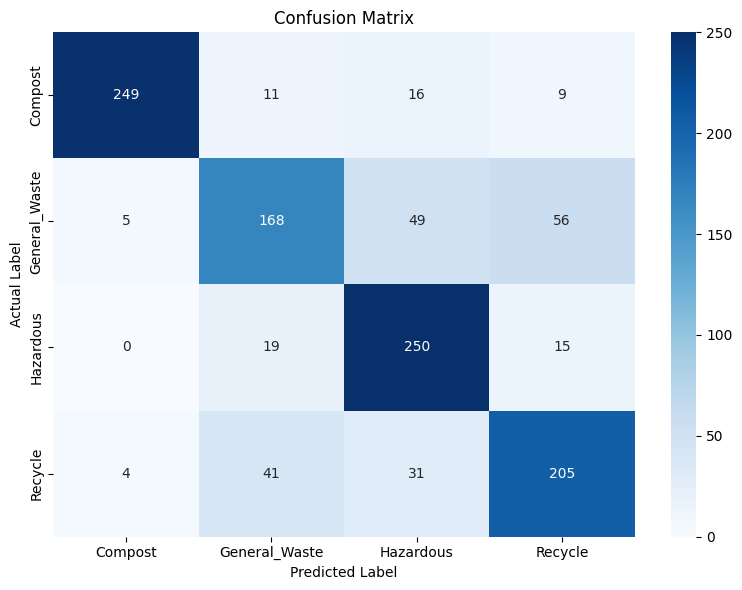

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# --- Configuration ---
# NOTE: This must be the same model file you just saved
MODEL_PATH = 'waste_classifier_tuned_cnn.h5'
TEST_DATA_DIR = '/content/dataset_split/test'
IMAGE_SIZE = (150, 150) # Use the same image size you trained with
BATCH_SIZE = 64        # Use the same batch size

# --- Load the saved model and the test data ---
model = tf.keras.models.load_model(MODEL_PATH)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # IMPORTANT: Do not shuffle test data
)

# --- Generate Predictions ---
# Get the true labels and class names from the generator
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Make predictions
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)


# --- Create and Display Reports ---

# 1. Classification Report (Precision, Recall, F1-Score)
print("\n================================================\n")
print("           CLASSIFICATION REPORT\n")
report = classification_report(true_labels, pred_labels, target_names=class_names)
print(report)
print("================================================\n")


# 2. Confusion Matrix
print("           CONFUSION MATRIX\n")
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
print("\n================================================")